In [1]:
from knn import KNN
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt 
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

In [2]:
cancer = load_breast_cancer()
X = cancer.data
Y = cancer.target
Y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [3]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

print(f"Training features shape: {X_train.shape}, Training labels shape: {Y_train.shape}")
print(f"Testing features shape: {X_test.shape}, Testing labels shape: {Y_test.shape}")

Training features shape: (455, 30), Training labels shape: (455,)
Testing features shape: (114, 30), Testing labels shape: (114,)


In [11]:
model = KNN(k=5)
model.fit(X_train, Y_train)
accuracy = model.evaluate(X_test, Y_test)
print(f"Accuracy: {accuracy * 100:.2f}%")


Accuracy: 95.61%


In [5]:
model = KNN(k=3)
model.fit(X_train, Y_train)
accuracy = model.evaluate(X_test, Y_test)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 92.98%


In [6]:
model = KNN(k=7)
model.fit(X_train, Y_train)
accuracy = model.evaluate(X_test, Y_test)
print(f"Accuracy: {accuracy * 100:.2f}%")


Accuracy: 95.61%


In [12]:
y_pred = model.predict(X_test)
y_pred

array([1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0], dtype=int64)

In [13]:
conff_matrix = np.zeros((2, 2), dtype=int)


for i in range(len(Y_test)):
    conff_matrix[Y_test[i], y_pred[i]] += 1


print("Confusion Matrix:")
print(conff_matrix)



Confusion Matrix:
[[38  5]
 [ 0 71]]


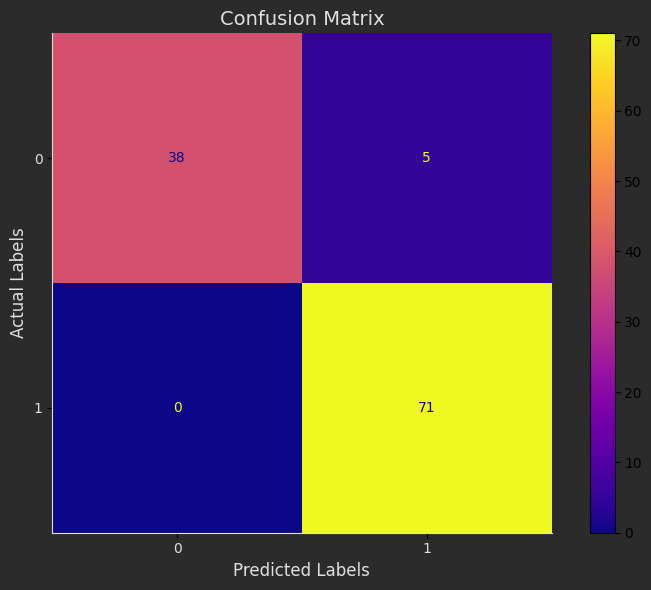

In [14]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=conff_matrix, display_labels=[0, 1])


fig = plt.figure(figsize=(8, 6))
fig.patch.set_facecolor('#2b2b2b')  
ax = plt.gca()
ax.set_facecolor('#2b2b2b') 


cm_display.plot(ax=ax, cmap='plasma')


plt.title('Confusion Matrix', fontsize=14, color='#e0e0e0')
plt.xlabel('Predicted Labels', fontsize=12, color='#e0e0e0')
plt.ylabel('Actual Labels', fontsize=12, color='#e0e0e0')
plt.xticks(fontsize=10, color='#e0e0e0')
plt.yticks(fontsize=10, color='#e0e0e0')


ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_color('#e0e0e0')
ax.spines['bottom'].set_color('#e0e0e0')


plt.tight_layout()
plt.show()